# Neural Network for Yield Predication 


In [1]:
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

# Loading the data

In [2]:
# we are using pandas libaray for reading the file
# We are reading ecxel file and path should be where you ecxel file is located.
# place "r" before the path string to address special character,such as '\'.
# Don't forget to put the file name at the end of the path + '.xlsx'

data=pd.read_excel(r"C:\python\Yield Predicition\plain 1.xlsx")



In [3]:
#Showing the first five entries of data
data.head()

,Field #,Seed,Month,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,NRDE,Soil Fertility,Yield
0,1,1,2019-02-01,21.2,10.2,2.0,73.6,0.0,40.7,103,57,50,0.33,0.23,0.13,-0.03,2,818
1,1,1,2019-03-01,28.6,14.4,2.3,63.4,0.0,29.1,103,57,50,0.22,0.13,0.08,-0.10,2,818
2,1,1,2019-04-01,34.3,20.5,1.9,51.8,2.4,53.6,103,57,50,0.21,0.14,0.11,-0.07,2,818
3,1,1,2019-05-01,31.7,21.5,3.7,57.5,1.6,48.9,103,57,50,0.29,0.19,0.14,-0.01,2,818
4,1,1,2019-06-01,42.9,28.8,3.2,39.6,1.4,28.9,103,57,50,0.29,0.20,0.14,0.00,2,818


In [4]:
# As there some extra columns so we need to perform data cleaning

data.drop(columns='Month', inplace=True)
data.drop(columns='NRDE', inplace=True)
data.drop(columns='Soil Fertility', inplace=True)
data.head()

,Field #,Seed,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,Yield
0,1,1,21.2,10.2,2.0,73.6,0.0,40.7,103,57,50,0.33,0.23,0.13,818
1,1,1,28.6,14.4,2.3,63.4,0.0,29.1,103,57,50,0.22,0.13,0.08,818
2,1,1,34.3,20.5,1.9,51.8,2.4,53.6,103,57,50,0.21,0.14,0.11,818
3,1,1,31.7,21.5,3.7,57.5,1.6,48.9,103,57,50,0.29,0.19,0.14,818
4,1,1,42.9,28.8,3.2,39.6,1.4,28.9,103,57,50,0.29,0.20,0.14,818


In [5]:
# Information about your data, how many entries and which type of data is present in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Field #             234 non-null    int64  
 1   Seed                234 non-null    int64  
 2   Max t°C             234 non-null    float64
 3   Min t°C             234 non-null    float64
 4   Wind Speed (m/s)    234 non-null    float64
 5   Humidity (%)        234 non-null    float64
 6   Precipitation (mm)  234 non-null    float64
 7   Rainfall            234 non-null    float64
 8   N                   234 non-null    int64  
 9   P                   234 non-null    int64  
 10  K                   234 non-null    int64  
 11  NDVI                234 non-null    float64
 12  NDMI                234 non-null    float64
 13  MSAVI               234 non-null    float64
 14  Yield               234 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 27.5 KB


In [6]:
#tells the shape of dataframe
data.shape

(234, 15)

<AxesSubplot:xlabel='Rainfall', ylabel='Yield'>

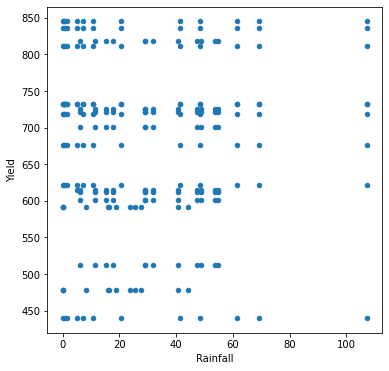

In [7]:
data.plot(kind='scatter', x='Rainfall', y='Yield', figsize=(6,6))

In [8]:
x=data.iloc[:, 0:13]
x.head()

,Field #,Seed,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI
0,1,1,21.2,10.2,2.0,73.6,0.0,40.7,103,57,50,0.33,0.23
1,1,1,28.6,14.4,2.3,63.4,0.0,29.1,103,57,50,0.22,0.13
2,1,1,34.3,20.5,1.9,51.8,2.4,53.6,103,57,50,0.21,0.14
3,1,1,31.7,21.5,3.7,57.5,1.6,48.9,103,57,50,0.29,0.19
4,1,1,42.9,28.8,3.2,39.6,1.4,28.9,103,57,50,0.29,0.20


In [9]:
y=data.iloc[:, -1]
y.head()

0    818
1    818
2    818
3    818
4    818
Name: Yield, dtype: int64

In [10]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
X_train.shape

(187, 13)

In [12]:
 y_train.shape

(187,)

In [13]:
X_test.shape

(47, 13)

 # Scaling

In [14]:
#train_labels = np.array(y_train)
#train_samples = np.array(X_train)
#train_labels, train_samples = shuffle(train_labels, train_samples)

In [15]:
#scaler = MinMaxScaler(feature_range=(0,1))
#scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [16]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

# Defines model

In [17]:
...
# define the keras model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(42, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(22, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(22, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 32)                448       
                                                                 
 dense_2 (Dense)             (None, 42)                1386      
                                                                 
 dense_3 (Dense)             (None, 32)                1376      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 22)                726       
                                                                 
 dense_6 (Dense)             (None, 22)                5

# Compiling the model

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# Training the model

In [20]:
history=model.fit(x=X_train, y=y_train, batch_size=2, epochs=3000, verbose=2)


Epoch 1/3000
94/94 - 1s - loss: 320698.5312 - 1s/epoch - 12ms/step
Epoch 2/3000
94/94 - 0s - loss: 75682.5625 - 162ms/epoch - 2ms/step
Epoch 3/3000
94/94 - 0s - loss: 44749.7383 - 171ms/epoch - 2ms/step
Epoch 4/3000
94/94 - 0s - loss: 35342.1836 - 171ms/epoch - 2ms/step
Epoch 5/3000
94/94 - 0s - loss: 29559.3496 - 170ms/epoch - 2ms/step
Epoch 6/3000
94/94 - 0s - loss: 27983.3418 - 167ms/epoch - 2ms/step
Epoch 7/3000
94/94 - 0s - loss: 24231.0996 - 177ms/epoch - 2ms/step
Epoch 8/3000
94/94 - 0s - loss: 22962.3242 - 175ms/epoch - 2ms/step
Epoch 9/3000
94/94 - 0s - loss: 20729.1406 - 160ms/epoch - 2ms/step
Epoch 10/3000
94/94 - 0s - loss: 20079.7188 - 164ms/epoch - 2ms/step
Epoch 11/3000
94/94 - 0s - loss: 17540.3320 - 164ms/epoch - 2ms/step
Epoch 12/3000
94/94 - 0s - loss: 16100.9668 - 157ms/epoch - 2ms/step
Epoch 13/3000
94/94 - 0s - loss: 15607.2109 - 178ms/epoch - 2ms/step
Epoch 14/3000
94/94 - 0s - loss: 14216.8545 - 157ms/epoch - 2ms/step
Epoch 15/3000
94/94 - 0s - loss: 13547.1553 

# Ploting the loss

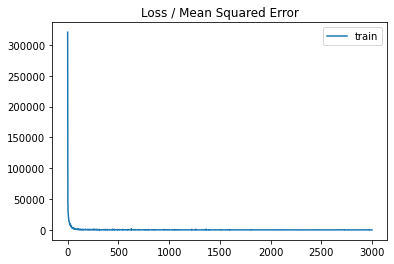

In [21]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Evaluate the model on test set


In [23]:
y_train_pred= model.predict(X_train)
y_predicted = model.predict(X_test)


error= mean_absolute_error(y_test,y_predicted)
print('MAE: %.3f' % error)

error1= mean_squared_error(y_test, y_predicted)
print('MAE: %.3f' % error1)

MAE: 62.253
MAE: 8023.511


<Figure size 432x288 with 0 Axes>

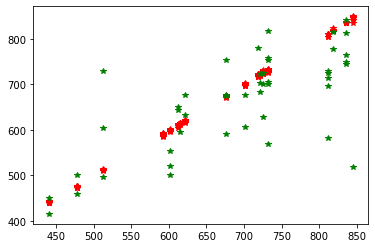

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_predicted, '*g')
plt.figure()